In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
plt.style.use('ggplot')

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
# MEAN OF Loss function: Log Likelihood = COST FUNCTION
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1 -y) * np.log(1 - hx))

In [36]:
# Gradient of the Loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

In [44]:
# Dataset
X = np.array([
    [2,1],
    [3,2],
    [4,4],
    [1,5],
    [2,6],
    [3,7]
])

y = np.array([1,1,1,0,0,0])

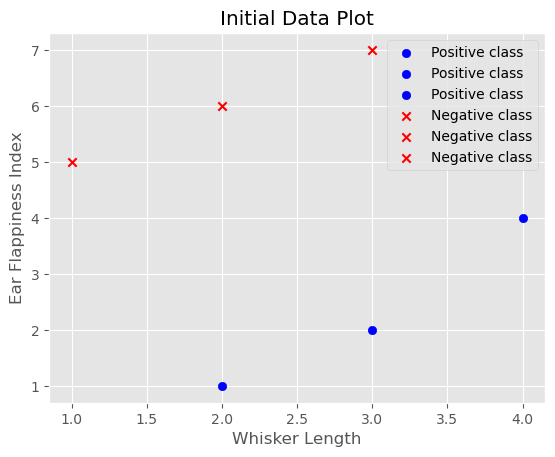

In [45]:
# Plot initnl Data
for idx, y_label in enumerate(y):
    plt.scatter(X[idx,0], X[idx,1], marker='o' if y_label == 1 else 'x', color = 'blue' if y_label == 1 else 'red', label='Positive class' if y_label == 1 else 'Negative class')   # observe bug in legend
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Initial Data Plot')
plt.legend(loc = 'best')

In [64]:
# Logistic regression model
def logistic_regression(X, y, learning_rate = 0.01, num_iterations=100):
    # Add intercept term to X   --  Augumented data for easier calculations
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # shape (m, n+1)
    
    # Initialize weights
    weights = np.zeros(X.shape[1])  # shape (n+1,)
    
    for i in range(num_iterations):
        # Compute linear combination
        z = np.dot(X, weights)  # shape (m,)
        
        # Apply sigmoid function
        hx = sigmoid(z)  # shape (m,)
        
        # Compute loss
        loss = compute_loss(y, hx)
        
        # Compute gradient
        gradient = compute_gradient(X, y, hx)  # shape (n+1,)
        
        # Update weights
        weights -= learning_rate * gradient
        
        if i % 10 == 0:
            print(f"Iteration {i}: Theta={weights}, Loss: {loss}")
            plot_decision_boundary(X, y, weights, loss, i)
    
    return weights

In [50]:
# plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o', label='Positive class' if iteration == 0 else "")
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x', label='Negative class' if iteration == 0 else "")
    
    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array([np.min(X[:, 1]) -1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, color='black')
    
    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)
    plt.xlabel('Whisker Length')
    plt.ylabel('Ear Flappiness Index')
    plt.title(f'Decision Boundary at Iteration {iteration}, Loss: {loss:.4f}')
    if iteration == 0:
        plt.legend()
    plt.show()

Iteration 0: Theta=[ 0.          0.0025     -0.00916667], Loss: 0.6931471805599453


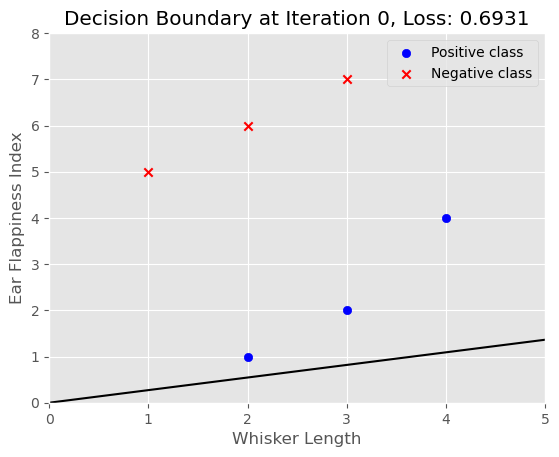

Iteration 10: Theta=[ 0.00351898  0.03583314 -0.08124515], Loss: 0.626064551401304


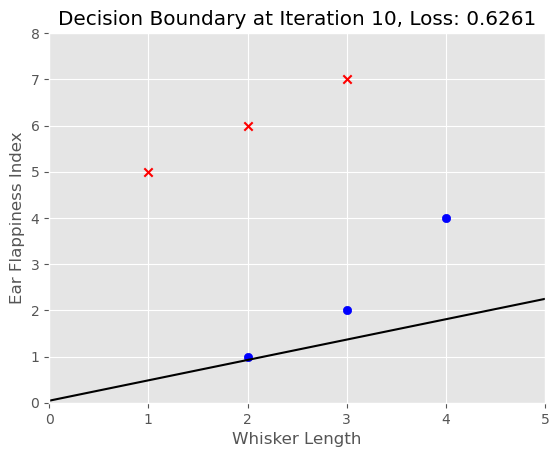

Iteration 20: Theta=[ 0.0107534   0.07750049 -0.13121449], Loss: 0.582126242450267


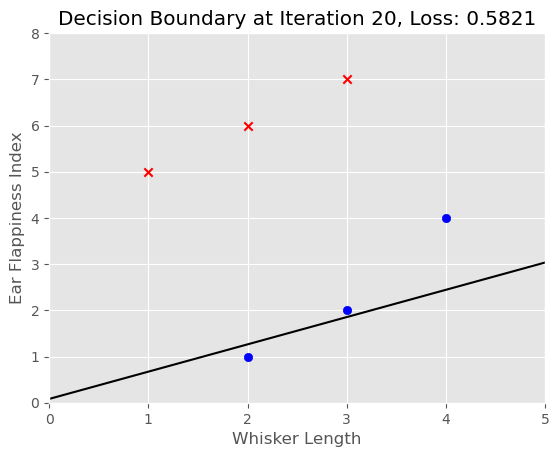

Iteration 30: Theta=[ 0.01952555  0.12200009 -0.17007813], Loss: 0.5460171296272921


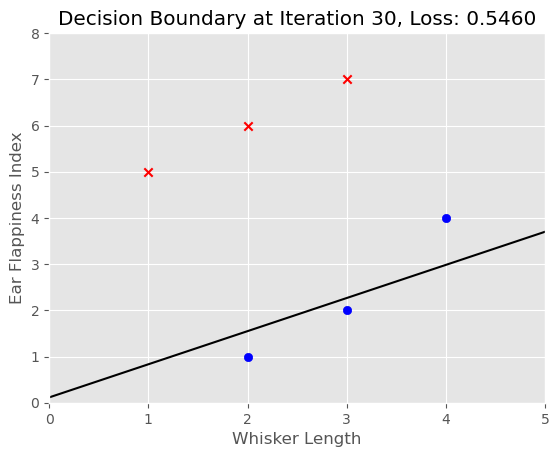

Iteration 40: Theta=[ 0.02882972  0.16681759 -0.20296236], Loss: 0.5139871174564513


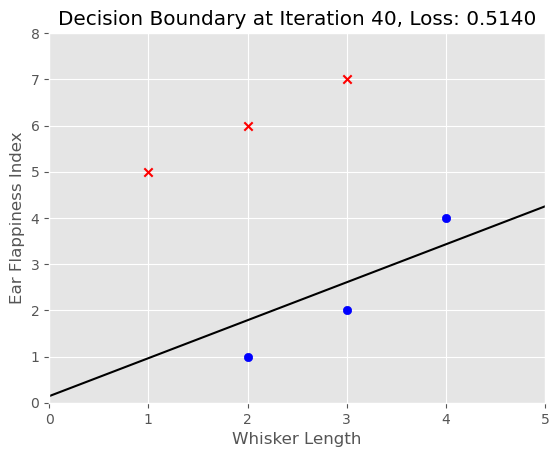

Iteration 50: Theta=[ 0.03819345  0.21079708 -0.23234289], Loss: 0.4849280943410818


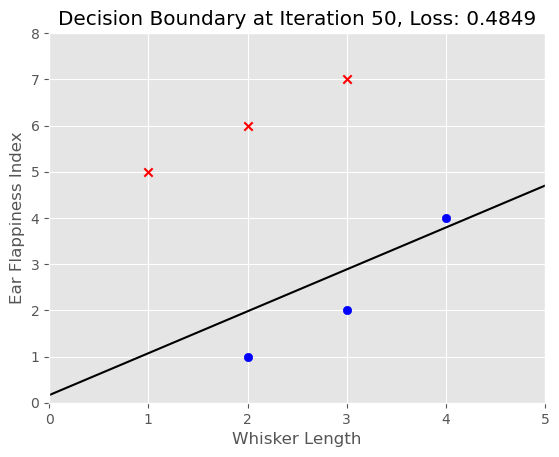

Iteration 60: Theta=[ 0.04739475  0.25342232 -0.25946218], Loss: 0.4583774412835471


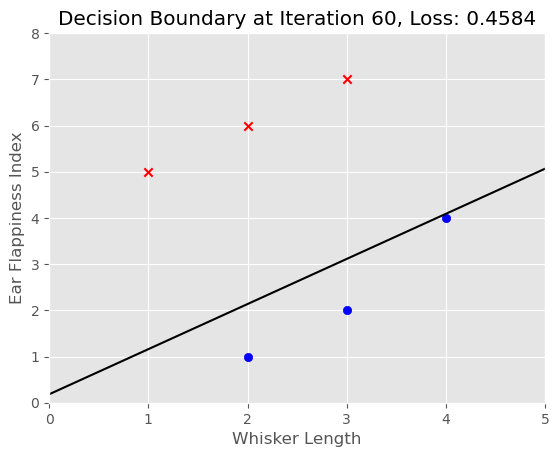

Iteration 70: Theta=[ 0.05633317  0.29448797 -0.28496725], Loss: 0.43404858960729104


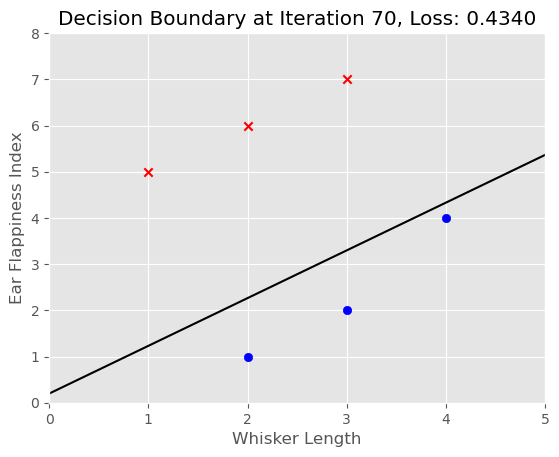

Iteration 80: Theta=[ 0.0649683   0.33394185 -0.30920989], Loss: 0.41171500685124646


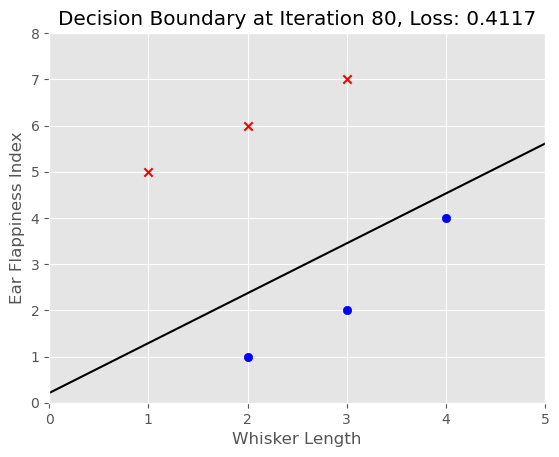

Iteration 90: Theta=[ 0.07328952  0.37180678 -0.33239254], Loss: 0.3911801275717041


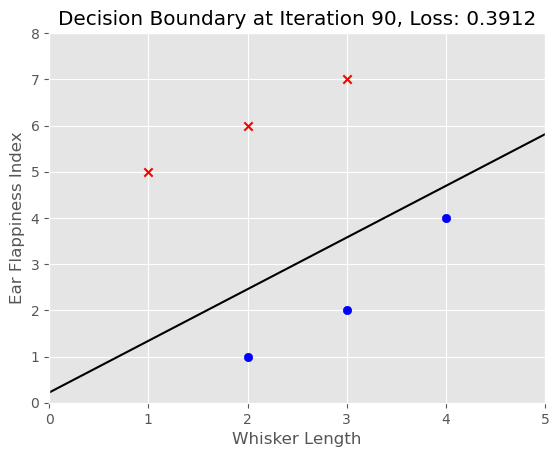

In [65]:
# Training the model
weights = logistic_regression(X, y)